In [52]:
# from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [53]:
def normalize(X):
    for i in range(X.shape[1]):
        X[:,i] = (X[:,i] - X[:,i].mean())/X[:,i].std()
    return X

In [54]:
k = 10
p = 8
def get_data():
    """
    Returns the data from the xlsx file
    """
    file_name = 'yeast.csv' 
    df = pd.read_csv(file_name, index_col=0, header=None)
    # print(df.head()) # print the first 5 rows
    return df

md = get_data()
md.dropna(inplace = True)
print(md.shape)
md.replace('?', 0, inplace = True)

print(md)

(1484, 9)
               1     2     3     4    5    6     7     8    9
0                                                            
ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22  MIT
ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22  MIT
ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22  MIT
AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22  NUC
AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22  MIT
...          ...   ...   ...   ...  ...  ...   ...   ...  ...
YUR1_YEAST  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22  ME2
ZIP1_YEAST  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47  NUC
ZNRP_YEAST  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22  ME2
ZUO1_YEAST  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39  NUC
G6PD_YEAST  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22  CYT

[1484 rows x 9 columns]


In [55]:
X = md.iloc[:, 0:8].values.reshape(-1, 8)


print(X)
print(X.shape)
# add 1 to the first column
# X = np.insert(X, 0, 1, axis=1)
# np.random.shuffle(X)

print('X:', X)
print(X.shape)

X = normalize(X)
print(X)

M = X.shape[0]
Y = md.iloc[:, 8:9].values.reshape(-1, 1)


[[0.58 0.61 0.47 ... 0.   0.48 0.22]
 [0.43 0.67 0.48 ... 0.   0.53 0.22]
 [0.64 0.62 0.49 ... 0.   0.53 0.22]
 ...
 [0.67 0.57 0.36 ... 0.   0.56 0.22]
 [0.43 0.4  0.6  ... 0.   0.53 0.39]
 [0.65 0.54 0.54 ... 0.   0.53 0.22]]
(1484, 8)
X: [[0.58 0.61 0.47 ... 0.   0.48 0.22]
 [0.43 0.67 0.48 ... 0.   0.53 0.22]
 [0.64 0.62 0.49 ... 0.   0.53 0.22]
 ...
 [0.67 0.57 0.36 ... 0.   0.56 0.22]
 [0.43 0.4  0.6  ... 0.   0.53 0.39]
 [0.65 0.54 0.54 ... 0.   0.53 0.22]]
(1484, 8)
[[ 0.58198136  0.88848148 -0.3466451  ... -0.0991314  -0.34417514
  -0.5279193 ]
 [-0.51089067  1.37281104 -0.23122636 ... -0.0991314   0.52121948
  -0.5279193 ]
 [ 1.01913017  0.96920307 -0.11580762 ... -0.0991314   0.52121948
  -0.5279193 ]
 ...
 [ 1.23770457  0.5655951  -1.61625127 ... -0.0991314   1.04045625
  -0.5279193 ]
 [-0.51089067 -0.80667199  1.15379854 ... -0.0991314   0.52121948
   1.06900494]
 [ 1.0919883   0.32343032  0.46128609 ... -0.0991314   0.52121948
  -0.5279193 ]]


In [56]:
def p(i):
    return 1 / (1 + np.exp(-i))

In [57]:
outputs = ['CYT', 'NUC', 'MIT', 'ME3', 'ME2', 'ME1', 'EXC', 'VAC', 'POX', 'ERL']

print('results', Y[0] == outputs[2])
y = np.zeros((len(Y), 10))
for i in range(len(Y)):
        for j in range(10):
            if outputs[j] == Y[i]:
                  y[i][j] = 1
            else:
                  y[i][j] = 0
print(y.shape)
# for i in range(10):
#     print(outputs[i], ': ', y[i])

results [ True]
(1484, 10)


In [61]:
eta = 1
beta = np.zeros((10, 8))

for i in range(10):
    beta[i] = np.random.rand(1, 8)

print(beta)
gradient = np.zeros((10, 8))
trainNo = 1200

n = 0
while (True):
    for i in range(trainNo):   
        tmp = p(X[i] @ beta.T)
        tmp = tmp - y[i]
        for t in range(k):
            gradient[t] = gradient[t] + tmp[t] * X[i]
    gradient = gradient / trainNo
    
    
    beta = beta - eta * gradient
    print('g: ', gradient, 'norm', np.linalg.norm(gradient))

    n = n + 1
    if n == trainNo or np.linalg.norm(gradient) < 0.0097:
        break
    eta = eta * 0.99

print('beta: ', beta)

[[0.9187171  0.05112178 0.68498509 0.85783274 0.76723626 0.45956204
  0.42851066 0.19898316]
 [0.40131032 0.77751146 0.64646532 0.88350201 0.90162899 0.96452571
  0.02002582 0.20598235]
 [0.77788677 0.28409957 0.56908729 0.28354717 0.82937023 0.22850755
  0.32179967 0.28305128]
 [0.20058353 0.53719301 0.9412377  0.66235314 0.84837136 0.04465457
  0.7997528  0.94679168]
 [0.49435491 0.95163188 0.15740816 0.04485103 0.76173441 0.31903723
  0.70492651 0.56589509]
 [0.15736617 0.24661054 0.55952685 0.71973517 0.65591626 0.71472821
  0.09716009 0.20311455]
 [0.03237961 0.97847791 0.19574185 0.71657029 0.328119   0.8552512
  0.88991372 0.32216859]
 [0.48894945 0.25934231 0.56498632 0.80225914 0.43626508 0.48792717
  0.56541386 0.34505081]
 [0.52784702 0.78541095 0.3821164  0.25426532 0.6389768  0.30677098
  0.3671014  0.98477266]
 [0.96109652 0.3664988  0.42964799 0.81345337 0.89877695 0.41652327
  0.25916749 0.61717743]]
g:  [[ 0.20220635  0.16137766 -0.02786252  0.27968605  0.06778924  0.0

In [62]:
# one or not classification
y_pred = np.zeros(M - trainNo)
estimates = np.zeros(10)

y_pred_list = []


for i in range(M - trainNo):
    for t in range(10):
        estimates[t] = p(np.dot(X[trainNo + i], beta[t]))
    y_pred[i] = np.argmax(estimates)
    # print(estimates)
    # print(x_pred[i])
# print(y_pred)
# print(type(y_pred[0]))
for i in range(M - trainNo):
    print(outputs[int(y_pred[i])], end=' ')
    y_pred_list.append(outputs[int(y_pred[i])])
print()

correct = 0
for i in range(M - trainNo):
    if np.where(y[trainNo + i] == 1) == y_pred[i]:
        correct = correct + 1
print(correct / (M - trainNo), (M - trainNo))


CYT NUC ME3 NUC ME3 ME3 ME3 EXC EXC EXC CYT CYT CYT NUC ME3 CYT NUC ME3 MIT MIT ME3 CYT NUC NUC CYT ME3 ME3 EXC ME3 NUC NUC ME3 CYT CYT ME2 ME3 CYT MIT MIT MIT NUC CYT CYT CYT NUC NUC MIT NUC NUC NUC NUC NUC NUC CYT MIT CYT ME3 CYT ME3 NUC NUC NUC NUC CYT CYT ME2 CYT ME2 EXC CYT CYT CYT CYT CYT NUC NUC CYT MIT ME3 CYT CYT CYT CYT CYT CYT NUC NUC NUC NUC CYT NUC CYT NUC CYT MIT CYT ME3 ME2 MIT ME3 CYT CYT CYT CYT MIT CYT NUC CYT NUC CYT MIT MIT ME3 CYT CYT NUC CYT NUC NUC NUC ME3 NUC NUC MIT CYT CYT CYT MIT NUC ME3 CYT CYT CYT NUC CYT ME3 CYT ME3 CYT CYT CYT CYT NUC ME3 ME3 NUC ME2 CYT CYT CYT MIT CYT CYT CYT ME3 NUC ME2 NUC ME3 NUC ME3 ME3 ME3 ME3 ME2 ME3 NUC MIT MIT MIT ME3 ME3 ME3 MIT MIT ME3 NUC ME3 CYT MIT ME3 ME3 NUC ME3 NUC ME3 MIT ME3 POX POX ME3 EXC ME3 ME3 ME3 NUC MIT MIT ME3 ME3 ME3 ME3 ME3 ME3 CYT ME3 ME3 ME3 ME3 NUC ME2 ME3 NUC ME3 CYT NUC ME3 ME3 ME3 ME3 ME2 ME3 NUC ME3 ME3 NUC ME3 ME3 ME3 MIT ME3 ME3 ME2 ME3 ME2 NUC EXC EXC ME3 MIT ME3 NUC ME2 ME3 ME3 ME3 MIT NUC NUC EXC 

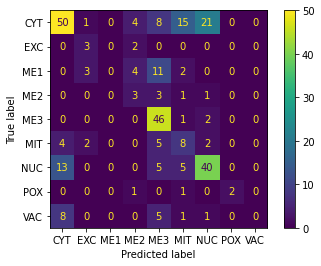

In [63]:
ConfusionMatrixDisplay.from_predictions(Y[trainNo:], y_pred_list)
plt.show()